<span style='font-family:"Times New Roman"'><font size="3">ML-zoomcamp Data talks cours 3 : </font></span>
<br />
<br />
<br />
<br />
<span style='font-family:"Times New Roman"'><div align="center"><font size="6">**ML for classification, reg_log**</font></div></span>
<br /><br />
<span style='font-family:"Times New Roman"'><font size="5"><div align="right">*25 sept - 2 oct 2023*</div></font></span>
<br />
[cours](https://github.com/DataTalksClub/machine-learning-zoomcamp/tree/master/03-classification)<br />
[ennoncé du devoir](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/03-classification/homework.md)</font></span></div>
<br />
_____
<span style='color:blue'></span>
<br />
<br />

## Homework

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.

### Dataset

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

In [1]:
# wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

### Features

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`

### Data preparation

* Select only the features from above and transform their names using next line:

In [4]:
# data.columns = data.columns.str.replace(' ', '_').str.lower()

In [5]:
df = df[[
    'Make',
    'Model',
    'Year',
    'Engine HP',
    'Engine Cylinders',
    'Transmission Type',
    'Vehicle Style',
    'highway MPG',
    'city mpg',
    'MSRP'
]]
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


* Fill in the missing values of the selected features with 0.
* Rename `MSRP` variable to `price`.

In [6]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [7]:
df = df.fillna(0)

In [8]:
df.rename(columns = {'msrp':'price'}, inplace = True)

In [9]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- `AUTOMATIC`
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`

In [10]:
df.transmission_type.mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

In [11]:
# vérification
df.groupby(['transmission_type'])['transmission_type'].count()

transmission_type
AUTOMATED_MANUAL     626
AUTOMATIC           8266
DIRECT_DRIVE          68
MANUAL              2935
UNKNOWN               19
Name: transmission_type, dtype: int64

In [12]:
df.transmission_type.value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

### Question 2

In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg`

In [13]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [14]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']

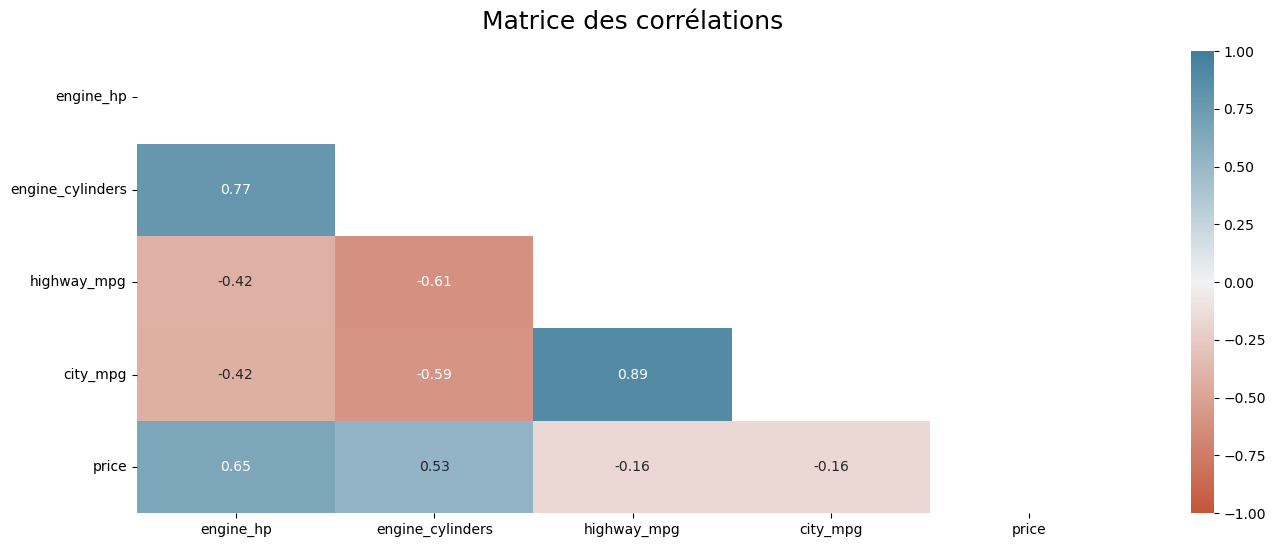

In [15]:
cmap = sns.diverging_palette(20, 230, as_cmap=True)

corr_df = df[numerical[1:]].corr(method='pearson')

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_df, dtype=bool))
heatmap = sns.heatmap(corr_df, mask=mask, vmin=-1, vmax=1, annot=True, cmap=cmap)
heatmap.set_title('Matrice des corrélations', fontdict={'fontsize':18}, pad=16);

In [16]:
# les 2 plus gros coeft
corr_df

,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
engine_hp,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.650095,0.526274,-0.160043,-0.157676,1.000000


solution : highway_mpg and city_mpg

In [17]:
# afficher les 2 plus importantes coorélation (abs)

### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

In [18]:
df.price.mean()

40594.737032063116

In [19]:
df.head(2)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650


In [20]:
df['above_average'] = df['price'] > (df['price'].mean())
df.above_average

0         True
1         True
2        False
3        False
4        False
         ...  
11909     True
11910     True
11911     True
11912     True
11913    False
Name: above_average, Length: 11914, dtype: bool

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`price`) is not in your dataframe.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- `transmission_type`
- `vehicle_style`


In [23]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

In [24]:
from sklearn.metrics import mutual_info_score

In [25]:
def mutual_info_above_avg(series):
    return mutual_info_score(series, df_train.above_average)

In [26]:
# discriminer les variables à retenir comme explicatives
mi = df_train[categorical].apply(mutual_info_above_avg)
round(mi.sort_values(ascending=True), 2)

transmission_type    0.02
vehicle_style        0.08
make                 0.24
model                0.46
dtype: float64

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95

#### one-hot encoding

In [27]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_cat = ohe.fit_transform(df_train[categorical].values)

In [30]:
pd.get_dummies(df_train[categorical])

,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Bugatti,make_Buick,make_Cadillac,make_Chevrolet,...,vehicle_style_Convertible,vehicle_style_Convertible SUV,vehicle_style_Coupe,vehicle_style_Crew Cab Pickup,vehicle_style_Extended Cab Pickup,vehicle_style_Passenger Minivan,vehicle_style_Passenger Van,vehicle_style_Regular Cab Pickup,vehicle_style_Sedan,vehicle_style_Wagon
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7143,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7144,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
7145,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7146,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# ici pas de traitement de variables numériques, mais on aurait pu les centrer-réduire avec scaler.transform
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
X_train_num = df_train[numerical].values

In [32]:
X_train = np.column_stack([X_train_num, X_train_cat])

#### entraînement du modèle

In [33]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

#### accuracy sur le set de validation

In [34]:
X_val_num = df_val[numerical].values
#X_val_num = scaler.transform(X_val_num)

X_val_cat = ohe.transform(df_val[categorical].values)

X_val = np.column_stack([X_val_num, X_val_cat])

In [35]:
y_pred = model.predict_proba(X_val)[:, 1]
round(accuracy_score(y_val, y_pred >= 0.5), 2)

0.95

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `year`
- `engine_hp`
- `transmission_type`
- `city_mpg`

> **Note**: the difference doesn't have to be positive

#### modèle de référence à 4 variables 0.89

In [36]:
col = ['year', 'engine_hp', 'transmission_type', 'city_mpg']
df[col].head(2)

,year,engine_hp,transmission_type,city_mpg
0,2011,335.0,MANUAL,19
1,2011,300.0,MANUAL,19


In [37]:
df['transmission_type'].nunique()

5

In [38]:
# différencier var quali 'transmission_type' pour traitement ohe
cat = ['transmission_type']
X_train_cat = ohe.fit_transform(df_train[cat].values)
# listing var num à inclure
numerical = ['year', 'engine_hp', 'city_mpg']
X_train_num = df_train[numerical].values

X_train = np.column_stack([X_train_num, X_train_cat])

# entraînement aux même paramètres que précédemment, donc def model ne change pas
model.fit(X_train, y_train)

# traitement du val
X_val_num = df_val[numerical].values
X_val_cat = ohe.transform(df_val[cat].values)
X_val = np.column_stack([X_val_num, X_val_cat])

# observation des résultats
y_pred = model.predict_proba(X_val)[:, 1]
ref = round(accuracy_score(y_val, y_pred >= 0.5), 2)
print(ref)

0.89


#### modèle sans var quali transmission_type (0.88)

In [39]:
X_train = df_train[numerical].values
# entraînement aux même paramètres que précédemment, donc def model ne change pas
model.fit(X_train, y_train)

# traitement du val
X_val = df_val[numerical].values

# observation des résultats
y_pred = model.predict_proba(X_val)[:, 1]
score = round(accuracy_score(y_val, y_pred >= 0.5), 2)
print(score, round(ref-score, 2))

0.88 0.01


#### modèle sans year (0.89)

In [40]:
X_train_cat = ohe.fit_transform(df_train[cat].values)
# listing var num à inclure
numerical = ['engine_hp', 'city_mpg']
X_train_num = df_train[numerical].values

X_train = np.column_stack([X_train_num, X_train_cat])

# entraînement aux même paramètres que précédemment, donc def model ne change pas
model.fit(X_train, y_train)

# traitement du val
X_val_num = df_val[numerical].values
X_val_cat = ohe.transform(df_val[cat].values)
X_val = np.column_stack([X_val_num, X_val_cat])

# observation des résultats
y_pred = model.predict_proba(X_val)[:, 1]
score = round(accuracy_score(y_val, y_pred >= 0.5), 2)
print(score, round(ref-score, 2))

0.89 0.0


#### modèle sans engin_hp (0.74)

In [41]:
cat = ['transmission_type']
X_train_cat = ohe.fit_transform(df_train[cat].values)
# listing var num à inclure
numerical = ['year', 'city_mpg']
X_train_num = df_train[numerical].values

X_train = np.column_stack([X_train_num, X_train_cat])

# entraînement aux même paramètres que précédemment, donc def model ne change pas
model.fit(X_train, y_train)

# traitement du val
X_val_num = df_val[numerical].values
X_val_cat = ohe.transform(df_val[cat].values)
X_val = np.column_stack([X_val_num, X_val_cat])

# observation des résultats
y_pred = model.predict_proba(X_val)[:, 1]
score = round(accuracy_score(y_val, y_pred >= 0.5), 2)
print(score, round(ref-score, 2))

0.74 0.15


#### modèle sans city_mpg (0.88)

In [42]:
cat = ['transmission_type']
X_train_cat = ohe.fit_transform(df_train[cat].values)
# listing var num à inclure
numerical = ['year', 'engine_hp']
X_train_num = df_train[numerical].values

X_train = np.column_stack([X_train_num, X_train_cat])

# entraînement aux même paramètres que précédemment, donc def model ne change pas
model.fit(X_train, y_train)

# traitement du val
X_val_num = df_val[numerical].values
X_val_cat = ohe.transform(df_val[cat].values)
X_val = np.column_stack([X_val_num, X_val_cat])

# observation des résultats
y_pred = model.predict_proba(X_val)[:, 1]
score = round(accuracy_score(y_val, y_pred >= 0.5), 2)
print(score, round(ref-score, 2))

0.88 0.01


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

> **Note**: If there are multiple options, select the smallest `alpha`.

In [43]:
df.head(2)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,True
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,True


In [44]:
df = df.drop(columns = ['above_average'])
df['price'] = np.log1p(df.price)

In [45]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [46]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']
X_train_cat = ohe.fit_transform(df_train[categorical].values)

numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
X_train_num = df_train[numerical].values

X_train = np.column_stack([X_train_num, X_train_cat])

In [47]:
from sklearn.linear_model import Ridge
modele = Ridge(solver='sag', random_state=42)
modele.fit(X_train, y_train)

C:\Users\laara\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(random_state=42, solver='sag')

In [48]:
X_train.shape

(7148, 943)

In [49]:
X_val_num = df_val[numerical].values
X_val_cat = ohe.transform(df_val[categorical].values)
X_val = np.column_stack([X_val_num, X_val_cat])

In [50]:
X_val.shape

(2383, 943)

In [51]:
# observation des résultats
y_pred = modele.predict(X_val)

In [52]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_val, y_pred, squared=True)
RMSE

0.23699193506564495

In [ ]:
# tester alpha avec les valeurs [0, 0.01, 0.1, 1, 10]
param_alpha = [0, 0.01, 0.1, 1, 10]
score = []
for i in param_alpha :
    modele = Ridge(solver='sag', random_state=42, alpha=i)
    modele.fit(X_train, y_train)
    y_pred = modele.predict(X_val)
    RMSE = mean_squared_error(y_val, y_pred, squared=True)
    score.append(round(RMSE, 3))
    print(i, round(RMSE, 3))
print(param_alpha, score)

In [ ]:
pd.DataFrame(index = param_alpha, data = score, columns = ['score'])

## Submit the results

* Submit your results here: https://forms.gle/FFfNjEP4jU4rxnL26
* You can submit your solution multiple times. In this case, only the last submission will be used 
* If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 2 October (Monday), 23:00 CEST.

After that, the form will be closed.
